timestamp: 14:00:48 - 14:12:36

# Computer Vision and Convolution Neural Network with PyTorch

***
### Introduction
***
* *Computer vision can be used for various problems such as: *
  - *Binary classification*
  - *Multi class Classification*
  - *Object Detection*
  - *Segmentation*

timestamp: 14:12:38 - 14:27:48

### Computer vision Input and output shape

Image data is represented in form of :
* [batch_size,color_channel,height,wigth]
              OR

* [batch_size,height,wigth,color_channel]   

* *We generally use convulational neural network for image  processing and computer vision problems*

* *We can stack layers of CNN in any order we want or as per the problem*

timestamp: 14:27:49 - 14:37:10

### Importing PyTorch's Computer vision library **TorchVision**

### *Getting started with Computer vision with pytorch*

*Computer vision Libraries in PyTorch:*
- $1. torchvision$
- $2. torchvision.dataset$
- $3. torchvision.models$
- $4. torchvision.transforms$
- $5. torch.utils.data.Dataset$
- $5. torch.utils.data.DataLoader$



In [1]:
# getting started with Computer vision with pytorch

import torch
from torch import nn


# importing torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor


#importing matplotlib
import matplotlib.pyplot as plt


print(torch.__version__)
print(torchvision.__version__)

2.6.0+cu124
0.21.0+cu124


timestamp: 14:37:10 - 14:51:40

### Getting a Computer vision dataset and checking input and output features


#### Getting a Dataset

We'll use FashionMNIST


In [2]:
#setting up training data
train_data=datasets.FashionMNIST(
    root="data", #where to download data to?
    train=True, #we want training data
    download=True, #do we want to download data?
    transform=torchvision.transforms.ToTensor(), # transforming the data
    target_transform=None # transforming the labels
)

test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 10.6MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 167kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.05MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 13.8MB/s]


In [3]:
# checking parameters
len(train_data),len(test_data)

(60000, 10000)

In [4]:
#seeing the first training example
image,label=train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_name= train_data.classes
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
# checking image shape and image label
print(f"Image shape : {image.shape} -> [color_channel,height,width]")
print(f"Image label : {class_name[label]}")

Image shape : torch.Size([1, 28, 28]) -> [color_channel,height,width]
Image label : Ankle boot


timestamp: 14:37:10 - 15:01:33

### Visualising random samples of data



image shape : torch.Size([1, 28, 28])


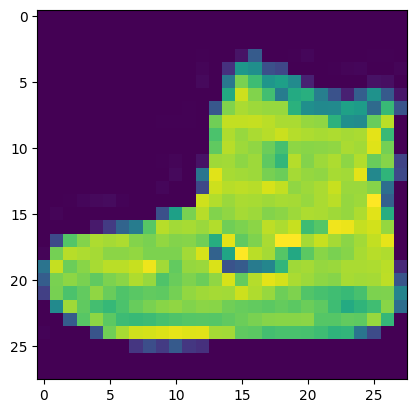

In [8]:
import matplotlib.pyplot as plt
image,label = train_data[0]
print(f"image shape : {image.shape}")
plt.imshow(image.squeeze())

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

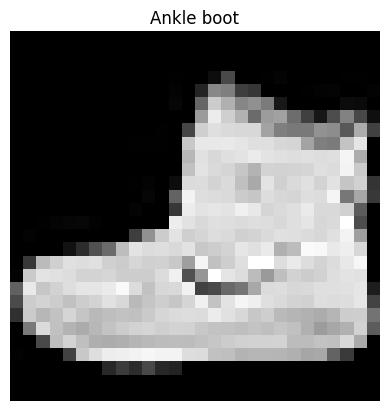

In [9]:
plt.imshow(image.squeeze(),cmap='gray')
plt.title(class_name[label])
plt.axis(False)

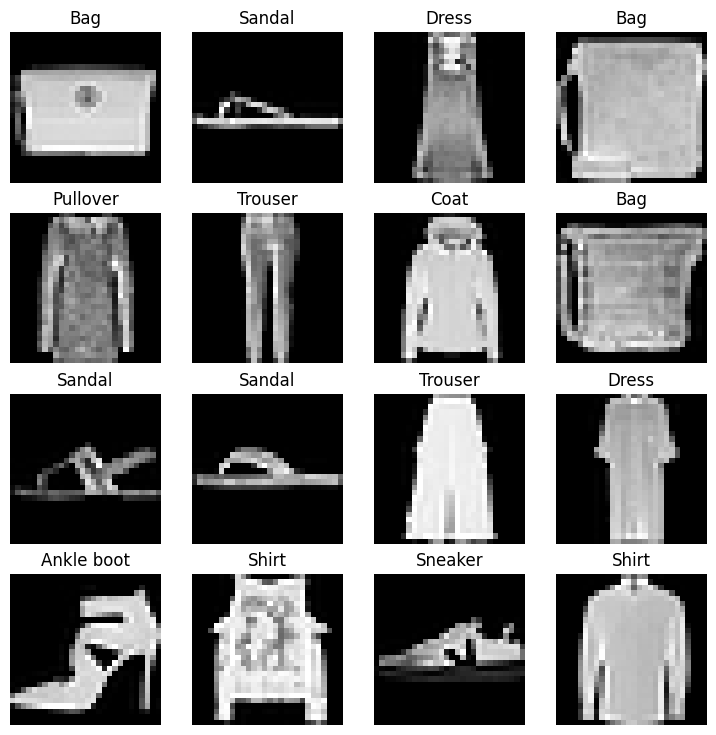

In [10]:
#ploting some more data
# torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows,cols =4,4
for i in range(1,rows*cols+1):
  random_idx= torch.randint(0,len(train_data),size=[1]).item()
  # print(random_idx)
  img,label=train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_name[label])
  plt.axis(False)

timestamp: 15:01:34 - 15:21:16
### DataLoader overview and understanding mini batches

* *DataLoader turns dataset into Python iterable*

* *We will do it using mini batches*

* *Reasons for using mini batches::*
  1. *It is more computationlly efficient.*
  2. *It gives our neural network more chances to update its gradient per epoch*

In [11]:
from torch.utils.data import DataLoader

#setting up batchsize
BATCH_SIZE = 32

# turning data in batches
train_dataloader=DataLoader(dataset=train_data,
                     batch_size=BATCH_SIZE,
                            shuffle=True)
test_dataloader=DataLoader(dataset=test_data,
                     batch_size=BATCH_SIZE,
                            shuffle=False)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f190cd3b9d0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f190cb7ff10>)

In [14]:
# printintg what's we have created
print(f"DataLoaders: {train_dataloader,test_dataloader}")
print(f"Length of train_dataloader : {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test_dataloader : {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f190cd3b9d0>, <torch.utils.data.dataloader.DataLoader object at 0x7f190cb7ff10>)
Length of train_dataloader : 1875 batches of 32
Length of test_dataloader : 313 batches of 32


In [15]:
train_features_batch,train_labels_batch =next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size : torch.Size([1, 28, 28])
Label : 2 , label size : torch.Size([])


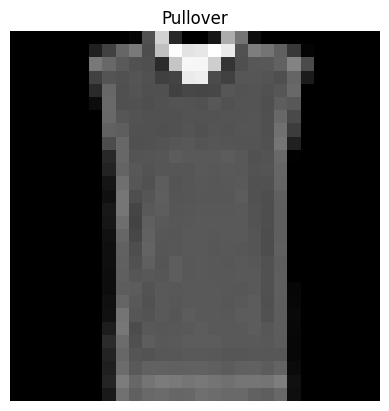

In [27]:
#showing a sample
# torch.manual_seed(42)
random_idx= torch.randint(0,len(train_features_batch),size=[1]).item()
img,label=train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_name[label])
plt.axis(False)
print(f"Image size : {img.shape}")
print(f"Label : {label} , label size : {label.shape}")

timestamp:  15:21:16 - 15:35:55
### Model_0 : creating a baseline with 2 linear layer
### Model_0 : The baseline model
* *We'll be building a baseline model. it is a simple model we'll try nad improve upon with subsequent models/experiments*

* *In other words: Start simply nad adds complexity as necessary*




In [30]:
# Creating a flatten layer
flatten_model = nn.Flatten()

#getting a simgle sample
x=train_features_batch[0]

#Flatten the sample

output=flatten_model(x) #forward pass

# printing what happen
print(f"Shape before flattening : {x.shape}")
print(f"Shape after flattening : {output.shape}")

Shape before flattening : torch.Size([1, 28, 28])
Shape after flattening : torch.Size([1, 784])


In [41]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )
  def forward(self,x):
      return self.layer_stack(x)

In [44]:
torch.manual_seed(42)

# Setup model input parameters
model_0=FashionMNISTModelV0(
    input_shape=784,# this is 28*28
    hidden_units=10,# number of units in hidden layer
    output_shape=len(class_name)
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [45]:
dummy_x = torch.rand(1,1,28,28)
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)